In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função que simula a subida da colina (f(x) = (x - 2)^2)
def caminho(x):
    return -((x - 2) ** 2) + 5  # Pico da colina em (2, 5), ajustado para cima

# O gradiente da função (indica o quanto a posição deve ser ajustada)
def gradiente(x):
    return 2 * (x - 2)  # O gradiente aponta para o topo da colina

# Função para realizar a "corrida" com o momentum
def corrida_com_momentum(learning_rate, momentum, num_passos):
    x = -2  # Ponto inicial (começando longe do topo)
    velocidade = 0  # Sem velocidade no início

    caminho_percorrido = []  # Guardar as posições

    for _ in range(num_passos):
        g = gradiente(x)  # Calcula o gradiente
        velocidade = momentum * velocidade - learning_rate * g  # Atualiza a velocidade com o momentum
        x = x + velocidade  # Ajusta a posição
        caminho_percorrido.append(x)  # Guarda a posição

    return caminho_percorrido

# Parâmetros para a "corrida"
learning_rate = 0.1  # Taxa de aprendizado
momentum = 0.9  # Valor de momentum
num_passos = 20  # Quantidade de passos

# Executa a corrida com momentum
caminho_percorrido = corrida_com_momentum(learning_rate, momentum, num_passos)

# Exibe os valores percorridos
#for i, posicao in enumerate(caminho_percorrido):
    #print(f"Passo {i + 1}: Posição = {posicao:.4f}")

# Visualização do gráfico
x_vals = np.linspace(-3, 6, 100)  # Gera valores no intervalo [-3, 6] para incluir o primeiro ponto
y_vals = caminho(x_vals)  # Calcula os valores da função para o gráfico

# Plota a curva da colina
plt.plot(x_vals, y_vals, label="Subida da colina", color="blue")  # A curva da colina em azul
# Plota o caminho percorrido pelo algoritmo com momentum
plt.plot(caminho_percorrido, caminho(np.array(caminho_percorrido)), 'o-', label="Caminho com Momentum", color="red")

# Adiciona números ao gráfico para indicar a sequência dos passos
for i, posicao in enumerate(caminho_percorrido):
    # Alterna a posição dos números (acima ou abaixo do ponto) para evitar sobreposição
    if i % 2 == 0:
        plt.text(posicao, caminho(posicao) + 0.5, str(i + 1), fontsize=8, color="black", ha="center")
    else:
        plt.text(posicao, caminho(posicao) - 0.8, str(i + 1), fontsize=8, color="black", ha="center")

# Configurações do gráfico
plt.xlabel("Posição x")
plt.ylabel("Altura (f(x))")
plt.title("Subida da Colina com Momentum")
plt.legend()
plt.grid(True)
plt.ylim(-8, 6)  # Ajustando o limite do eixo Y para mostrar a colina para cima
plt.xlim(-3, 6)  # Ajustando o limite do eixo X para incluir o primeiro ponto
plt.show()


Animação salva como 'animacao_momentum.html'


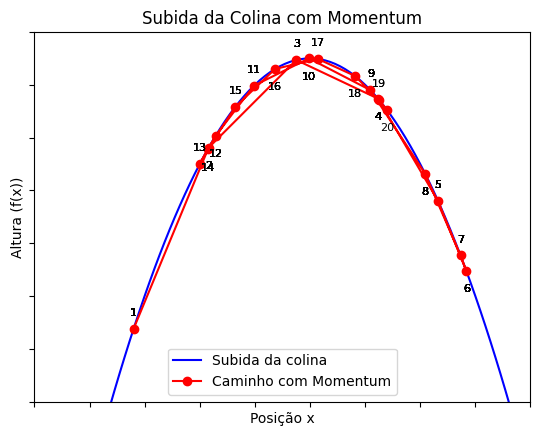

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Função que simula a subida da colina (f(x) = (x - 2)^2)
def caminho(x):
    return -((x - 2) ** 2) + 5  # Pico da colina em (2, 5), ajustado para cima

# O gradiente da função (indica o quanto a posição deve ser ajustada)
def gradiente(x):
    return 2 * (x - 2)  # O gradiente aponta para o topo da colina

# Função para realizar a "corrida" com o momentum
def corrida_com_momentum(learning_rate, momentum, num_passos):
    x = -2  # Ponto inicial (começando longe do topo)
    velocidade = 0  # Sem velocidade no início

    caminho_percorrido = []  # Guardar as posições

    for _ in range(num_passos):
        g = gradiente(x)  # Calcula o gradiente
        velocidade = momentum * velocidade - learning_rate * g  # Atualiza a velocidade com o momentum
        x = x + velocidade  # Ajusta a posição
        caminho_percorrido.append(x)  # Guarda a posição

    return caminho_percorrido

# Parâmetros para a "corrida"
learning_rate = 0.1  # Taxa de aprendizado
momentum = 0.9  # Valor de momentum
num_passos = 20  # Quantidade de passos

# Executa a corrida com momentum
caminho_percorrido = corrida_com_momentum(learning_rate, momentum, num_passos)

# Visualização do gráfico
x_vals = np.linspace(-3, 6, 100)  # Gera valores no intervalo [-3, 6] para incluir o primeiro ponto
y_vals = caminho(x_vals)  # Calcula os valores da função para o gráfico

# Criando a figura e o eixo para a animação
fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label="Subida da colina", color="blue")  # A curva da colina em azul
linha, = ax.plot([], [], 'o-', label="Caminho com Momentum", color="red")  # Linha vermelha inicial vazia
ax.set_xlim(-3, 6)
ax.set_ylim(-8, 6)
plt.xlabel("Posição x")
plt.ylabel("Altura (f(x))")
plt.title("Subida da Colina com Momentum")
plt.legend()

# Função de inicialização
def init():
    linha.set_data([], [])
    return linha,

# Função de animação
def update(frame):
    x = caminho_percorrido[:frame + 1]  # Pega os pontos até o frame atual
    y = caminho(np.array(x))  # Calcula os valores de y correspondentes
    linha.set_data(x, y)  # Atualiza a linha vermelha
    
    # Limpa os números antigos
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(False)

    # Adiciona números à sequência
    #for i in range(len(x)):
        #ax.text(x[i], y[i], str(i + 1), fontsize=8, ha='right', va='bottom', color='black')
    for i, posicao in enumerate(x):
        # Alterna a posição dos números (acima ou abaixo do ponto) para evitar sobreposição
        if i % 2 == 0:
            plt.text(posicao, caminho(posicao) + 0.5, str(i + 1), fontsize=8, color="black", ha="center")
        else:
            plt.text(posicao, caminho(posicao) - 0.8, str(i + 1), fontsize=8, color="black", ha="center")

    return linha,

# Criando a animação
ani = FuncAnimation(fig, update, frames=len(caminho_percorrido), init_func=init, blit=True, interval=1000)

# Salvando a animação como um arquivo HTML
ani.save('animacao_momentum.html', writer='html')

print("Animação salva como 'animacao_momentum.html'")
